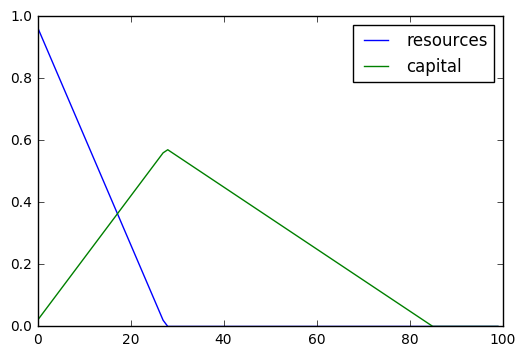

<function __main__.plot_simple_model>

In [26]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from copy import deepcopy

def simulate(initial_state, num_steps):
    state = initial_state
    history = []
    for i in range(0, num_steps):
        state = state.step()
        history.append(state)
    return history

class SimpleModel:
    def __init__(self, capital_growth_factor, capital_loss_factor, resources_loss_factor):
        self.capital_growth_factor = capital_growth_factor
        self.capital_loss_factor = capital_loss_factor
        self.resources_loss_factor = resources_loss_factor
        
        self.resources = 1.0
        self.capital = 0.0
    
    def step(self):
        next_state = deepcopy(self)
        
        delta1 = min(next_state.resources, self.capital_growth_factor)
        next_state.resources -= delta1
        next_state.capital += delta1
        
        next_state.capital -= min(next_state.capital, self.capital_loss_factor)
        next_state.resources -= min(next_state.resources, self.resources_loss_factor)
        
        return next_state

def plot_simple_model(**params):
    history = simulate(SimpleModel(**params), 100)
    plt.plot(list(state.resources for state in history), label='resources')
    plt.plot(list(state.capital for state in history), label='capital')
    plt.legend()
    plt.show()

interact(
    plot_simple_model,
    capital_growth_factor=FloatSlider(min=0.0, max=0.1, value=0.03, step=0.001),
    capital_loss_factor=FloatSlider(min=0.0, max=0.1, value=0.01, step=0.001),
    resources_loss_factor=FloatSlider(min=0.0, max=0.1, value=0.005, step=0.001))

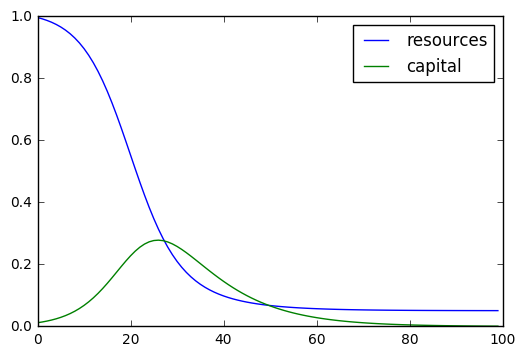

<function __main__.plot_model_with_feedback>

In [27]:
class ModelWithFeedback:
    def __init__(self, capital_growth_factor, capital_loss_factor, resources_loss_factor):
        self.capital_growth_factor = capital_growth_factor
        self.capital_loss_factor = capital_loss_factor
        self.resources_loss_factor = resources_loss_factor
        
        self.resources = 1.0
        self.capital = 0.01
    
    def step(self):
        next_state = deepcopy(self)
        
        delta1 = min(next_state.resources, self.resources * self.capital * self.capital_growth_factor)
        next_state.resources -= delta1
        next_state.capital += delta1
        
        next_state.capital -= min(next_state.capital, self.capital * self.capital_loss_factor)
        next_state.resources -= min(next_state.resources, self.resources * self.capital * self.resources_loss_factor)
        
        return next_state
    
def plot_model_with_feedback(**params):
    history = simulate(ModelWithFeedback(**params), 100)
    plt.plot(list(state.resources for state in history), label='resources')
    plt.plot(list(state.capital for state in history), label='capital')
    plt.legend()
    plt.show()

interact(
    plot_model_with_feedback,
    capital_growth_factor=FloatSlider(min=0.0, max=1.0, value=0.3, step=0.01),
    capital_loss_factor=FloatSlider(min=0.0, max=1.0, value=0.1, step=0.01),
    resources_loss_factor=FloatSlider(min=0.0, max=1.0, value=0.05, step=0.01))

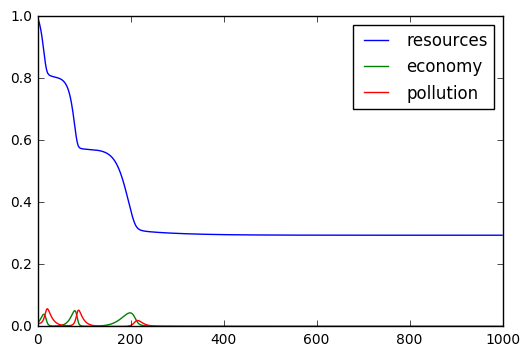

In [37]:
class ModelWithPollution:
    def __init__(self,
                 resources_loss_factor,
                 economy_growth_factor,
                 economy_loss_factor,
                 pollution_growth_factor,
                 pollution_loss_factor):
        self.resources_loss_factor = resources_loss_factor
        self.economy_growth_factor = economy_growth_factor
        self.economy_loss_factor = economy_loss_factor
        self.pollution_growth_factor = pollution_growth_factor
        self.pollution_loss_factor = pollution_loss_factor
        
        self.resources = 1.0
        self.economy = 0.01
        self.pollution = 0.01
    
    def step(self):
        next_state = deepcopy(self)
        
        delta1 = min(next_state.resources, self.resources * self.economy * self.economy_growth_factor)
        next_state.resources -= delta1
        next_state.resources -= min(next_state.resources, self.resources * self.economy * self.resources_loss_factor)
        next_state.economy += delta1

        delta2 = min(next_state.economy, self.economy * self.pollution * self.pollution_growth_factor)
        next_state.economy -= delta2
        next_state.economy -= min(next_state.economy, self.economy * self.economy_loss_factor)
        next_state.pollution += delta2
        
        next_state.pollution -= min(next_state.pollution, self.pollution * self.pollution_loss_factor)
        
        return next_state
    
def plot_model_with_pollution(**params):
    history = simulate(ModelWithPollution(**params), 1000)
    plt.plot(list(state.resources for state in history), label='resources')
    plt.plot(list(state.economy for state in history), label='economy')
    plt.plot(list(state.pollution for state in history), label='pollution')
    plt.legend()
    plt.show()

interact(
    plot_model_with_pollution,
    resources_loss_factor=FloatSlider(min=0.0, max=1.0, value=0.05, step=0.01),
    economy_growth_factor=FloatSlider(min=0.0, max=1.0, value=0.3, step=0.01),
    economy_loss_factor=FloatSlider(min=0.0, max=1.0, value=0.1, step=0.01),
    pollution_growth_factor=FloatSlider(min=0.0, max=100.0, value=0.3, step=0.01),
    pollution_loss_factor=FloatSlider(min=0.0, max=1.0, value=0.1, step=0.01))